Epoca 0: perdida = 0.6931
Epoca 20: perdida = 0.6693
Epoca 40: perdida = 0.6509
Epoca 60: perdida = 0.6344
Epoca 80: perdida = 0.6188
Epoca 100: perdida = 0.6040
Epoca 120: perdida = 0.5900
Epoca 140: perdida = 0.5766
Epoca 160: perdida = 0.5639
Epoca 180: perdida = 0.5519
Epoca 200: perdida = 0.5404
Epoca 220: perdida = 0.5294
Epoca 240: perdida = 0.5190
Epoca 260: perdida = 0.5090
Epoca 280: perdida = 0.4995
Epoca 300: perdida = 0.4905
Epoca 320: perdida = 0.4818
Epoca 340: perdida = 0.4735
Epoca 360: perdida = 0.4656
Epoca 380: perdida = 0.4580
Epoca 400: perdida = 0.4507
Epoca 420: perdida = 0.4438
Epoca 440: perdida = 0.4371
Epoca 460: perdida = 0.4306
Epoca 480: perdida = 0.4245
Epoca 500: perdida = 0.4185
Epoca 520: perdida = 0.4128
Epoca 540: perdida = 0.4074
Epoca 560: perdida = 0.4021
Epoca 580: perdida = 0.3970
Epoca 600: perdida = 0.3921
Epoca 620: perdida = 0.3873
Epoca 640: perdida = 0.3828
Epoca 660: perdida = 0.3784
Epoca 680: perdida = 0.3741
Epoca 700: perdida = 0.370

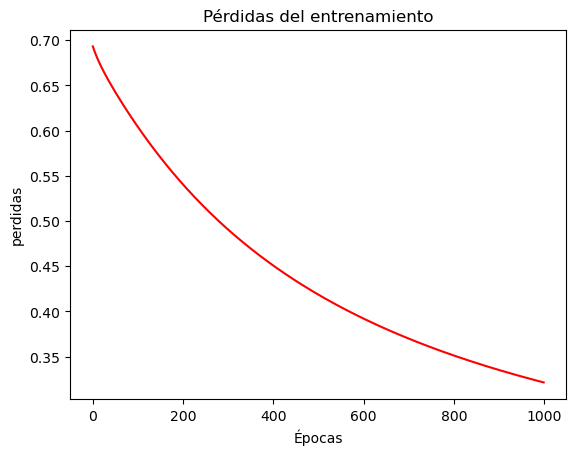


Parámetros finales: w = [-3.19177655 -3.47916182], b = 3.3679757797557017
Precisión del modelo: 0.93


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer datos
data = np.asarray(pd.read_csv("data.csv"))
X = data[:,0:2]
y = data[:,2]

def sigmoide(x):
    return 1 / (1 + np.exp(-x))


#entropía cruzada o maxima verosimilitud negativa
def EntropiaCruzada(y, y_hat):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

# Inicializar parámetros
w = np.zeros(X.shape[1])
b = 0
lr = 0.1
epochs = 1000

loses = []

# Entrenamiento del modelo de regresión logística
for i in range(epochs):
    
    # Calcular probabilidad de predicción
    ypred = sigmoide(np.dot(X, w) + b)     #prediccion
    
    # Calcular gradientes
    dw = np.dot(X.T, (ypred - y)) / y.size
    db = (ypred - y).mean()
    
    # Actualizar parámetros
    w -= lr * dw
    b -= lr * db
    
    # Calcular y mostrar costo
    loss = EntropiaCruzada(y, ypred)
    if i % 20 == 0:                                       
        print(f"Epoca {i}: perdida = {loss:.4f}")
    loses.append(loss)

#mostrar pérdidas
plt.plot(loses, color = 'red')
plt.title("Pérdidas del entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("perdidas")
plt.show()

        
# Mostrar parámetros finales y precisión del modelo
print(f"\nParámetros finales: w = {w}, b = {b}")
ypred = np.round(ypred)
acc = np.sum(ypred == y) / y.size
print(f"Precisión del modelo: {acc:.2f}")
